# Installing relevant packages

In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install nltk

In [ ]:
pip install matplotlib

# INITIAL STEPS

## Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau

## Loading Data

In [2]:
df = pd.read_json('Dataset.json')
df.head

<bound method NDFrame.head of                                                  content  \
0                                 Get fucking real dude.   
1       She is as dirty as they come  and that crook ...   
2       why did you fuck it up. I could do it all day...   
3       Dude they dont finish enclosing the fucking s...   
4       WTF are you talking about Men? No men thats n...   
...                                                  ...   
19996    I dont. But what is complaining about it goi...   
19997   Bahah  yeah i&;m totally just gonna&; get pis...   
19998       hahahahaha >:) im evil mwahahahahahahahahaha   
19999            What&;s something unique about Ohio? :)   
20000              Who is the biggest gossiper you know?   

                          annotation  extras  
0      {'notes': '', 'label': ['1']}     NaN  
1      {'notes': '', 'label': ['1']}     NaN  
2      {'notes': '', 'label': ['1']}     NaN  
3      {'notes': '', 'label': ['1']}     NaN  
4      {'notes': '', 'label': ['1']}     NaN  
...                              ...     ...  
19996  {'notes': '', 'label': ['0']}     NaN  
19997  {'notes': '', 'label': ['0']}     NaN  
19998  {'notes': '', 'label': ['0']}     NaN  
19999  {'notes': '', 'label': ['0']}     NaN  
20000  {'notes': '', 'label': ['0']}     NaN  

[20001 rows x 3 columns]>

In [3]:
for i in range(0,len(df)):
    if df.annotation[i]['label'][0] == '1':
        df.annotation[i] = 1
    else:
        df.annotation[i] = 0

Streaming output truncated to the last 5000 lines.
<ipython-input-3-63a5844c426a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 0
<ipython-input-3-63a5844c426a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 0
<ipython-input-3-63a5844c426a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 0
<ipython-input-3-63a5844c426a>:5: SettingWithCopyWarning: 
A value is trying to be se

In [4]:
df.drop(['extras'],axis = 1,inplace = True)
df

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [5]:
df.shape

(20001, 2)

## Preprocessing

In [6]:
nltk.download('stopwords')
stop = stopwords.words('english')

regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df ['content_without_stopwords'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df ['content_without_puncs'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))
del df['content_without_stopwords']
del df['content']
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,annotation,content_without_puncs
0,1,Get fucking real dude
1,1,She dirty come crook Rengel Dems fucking corru...
2,1,fuck up I could day too Lets hour Ping later s...
3,1,Dude dont finish enclosing fucking showers I h...
4,1,WTF talking Men No men thats menage thats gay
...,...,...
19996,0,I dont But complaining going do
19997,0,Bahah yeah im totally gonna get pissed talking...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,Whats something unique Ohio


In [7]:
#Stemming
porter_stemmer = PorterStemmer()
#punctuations
nltk.download('punkt')
tok_list = []
size = df.shape[0]

for i in range(size):
  word_data = df['content_without_puncs'][i]
  nltk_tokens = nltk.word_tokenize(word_data)
  final = ''
  for w in nltk_tokens:
    final = final + ' ' + porter_stemmer.stem(w)
  tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_puncs']
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,annotation,content_tokenize
0,1,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay
...,...,...
19996,0,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio


In [8]:
noNums = []
for i in range(len(df)):
  noNums.append(''.join([i for i in df['content_tokenize'][i] if not i.isdigit()]))

df['content'] = noNums
df

,annotation,content_tokenize,content
0,1,get fuck real dude,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay,wtf talk men no men that menag that gay
...,...,...,...
19996,0,i dont but complain go do,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio,what someth uniqu ohio


In [9]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())

In [10]:
print(tfIdf)

  (0, 3598)	0.5682792040556577
  (0, 10534)	0.6408032598619846
  (0, 4665)	0.3314842764826402
  (0, 4896)	0.3956616014132561
  (1, 7497)	0.1421522208901913
  (1, 7670)	0.18997382467613527
  (1, 10707)	0.3380770158779807
  (1, 7868)	0.17712641457020445
  (1, 6881)	0.2707206754001475
  (1, 2649)	0.3478358132370042
  (1, 3127)	0.36956626902789813
  (1, 10686)	0.36956626902789813
  (1, 2791)	0.3609013757539863
  (1, 2453)	0.20014266836955738
  (1, 3306)	0.294004579420996
  (1, 11402)	0.24231137330135857
  (1, 4665)	0.12302268120056382
  (2, 5648)	0.26264752682375
  (2, 1476)	0.2858475342270202
  (2, 14420)	0.28761927584628644
  (2, 11156)	0.4130661580674724
  (2, 7317)	0.3061308801267633
  (2, 9784)	0.38298243181872793
  (2, 5956)	0.28144866948736874
  (2, 7434)	0.24199503289435126
  :	:
  (19997, 8527)	0.362558005670761
  (19997, 14527)	0.1829917686470462
  (19997, 364)	0.2524980709313037
  (19997, 8632)	0.19487099515279527
  (19997, 5039)	0.21529577669215724
  (19997, 14639)	0.1516281744

In [11]:
print(tfIdf.shape) # means total rows  20001 with 14783 features

(20001, 14783)


In [12]:
df2 = pd.DataFrame(tfIdf[2].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"]) # for the second entry only (just to check if it's working)
df2 = df2.sort_values('TF-IDF', ascending=False)
print(df2.head(10))


         TF-IDF
sched  0.413066
ping   0.382982
later  0.306131
write  0.287619
book   0.285848
hour   0.281449
here   0.262648
let    0.241995
up     0.237401
could  0.223151


In [13]:
dfx = pd.DataFrame(tfIdf.toarray(), columns=tfIdfVectorizer.get_feature_names_out())
print(dfx)


        aa  aaaaaaaaaa  aaaaaanndgummi  aaaagh  aaaawwwww  aaand  \
0      0.0         0.0             0.0     0.0        0.0    0.0   
1      0.0         0.0             0.0     0.0        0.0    0.0   
2      0.0         0.0             0.0     0.0        0.0    0.0   
3      0.0         0.0             0.0     0.0        0.0    0.0   
4      0.0         0.0             0.0     0.0        0.0    0.0   
...    ...         ...             ...     ...        ...    ...   
19996  0.0         0.0             0.0     0.0        0.0    0.0   
19997  0.0         0.0             0.0     0.0        0.0    0.0   
19998  0.0         0.0             0.0     0.0        0.0    0.0   
19999  0.0         0.0             0.0     0.0        0.0    0.0   
20000  0.0         0.0             0.0     0.0        0.0    0.0   

       aaanyyywhoooooooo  aaargh  aaarrrg  aah  ...  zon  zone  zoo  zoom  \
0                    0.0     0.0      0.0  0.0  ...  0.0   0.0  0.0   0.0   
1                    0.0     

In [14]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names_out(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i = 0
    for item in sorted_scores:
        print("{0:50} Score: {1}".format(item[0], item[1]))
        i += 1
        if i > 25:
            break

display_scores(tfIdfVectorizer, tfIdf)


hate                                               Score: 533.8157298036014
fuck                                               Score: 503.76150769255435
damn                                               Score: 482.3875012051478
suck                                               Score: 407.37790877127185
ass                                                Score: 337.54089621427744
that                                               Score: 311.6250930420745
lol                                                Score: 298.0085779872157
im                                                 Score: 296.0216055277791
like                                               Score: 287.8183474868775
you                                                Score: 284.7850587424088
it                                                 Score: 254.75722294501585
get                                                Score: 253.19747902607998
what                                               Score: 221.43673623523864
know  

In [15]:
X=tfIdf.toarray()
y = np.array(df.annotation.tolist())
#Spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16000, 14783)
(16000,)
(4001, 14783)
(4001,)


In [16]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9750 6250]]


In [17]:
#Test Data
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [2429 1572]]


In [18]:
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [19]:
print(X_over.shape)
print(y_over.shape)

(19500, 14783)
(19500,)


In [20]:
unique_elements, counts_elements = np.unique(y_over, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9750 9750]]


# Visualization

<Axes: xlabel='annotation'>

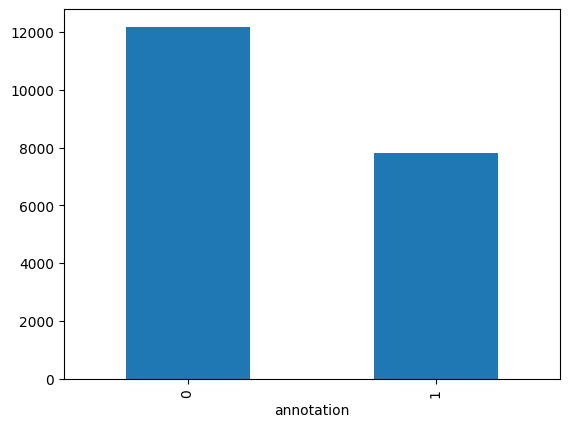

In [ ]:
df['annotation'].value_counts().sort_index().plot.bar()

In [ ]:
#Biasness
print("Positive Non cyber trolling: ", df.annotation.value_counts()[0]/len(df.annotation)*100,"%")
print("Cybertrolling: ", df.annotation.value_counts()[1]/len(df.annotation)*100,"%")

Positive Non cyber trolling:  60.89195540222989 %
Cybertrolling:  39.10804459777012 %


# Training and Calculating Scores

In [ ]:
pip install scikit-plot

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

def getStatsFromModel(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Plot precision-recall curve
    skplt.metrics.plot_precision_recall(y_test, model.predict_proba(X_test))
    plt.title('2-class Precision-Recall curve')
    plt.show()

    # Plot ROC curve
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()



## Normal Methods

Score: 0.6163459135216196
Confusion Matrix: 
 [[ 925 1504]
 [  31 1541]]
              precision    recall  f1-score   support

           0       0.97      0.38      0.55      2429
           1       0.51      0.98      0.67      1572

    accuracy                           0.62      4001
   macro avg       0.74      0.68      0.61      4001
weighted avg       0.79      0.62      0.59      4001



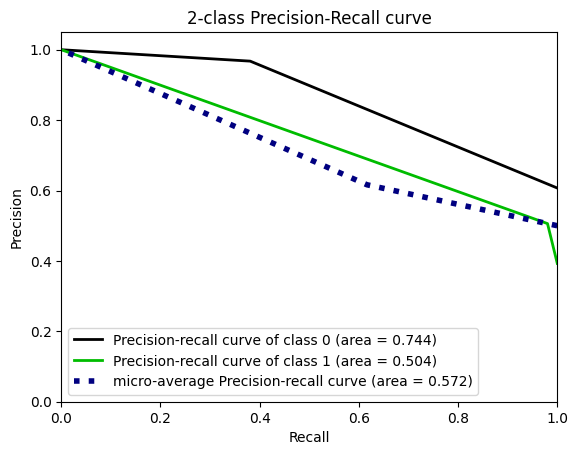

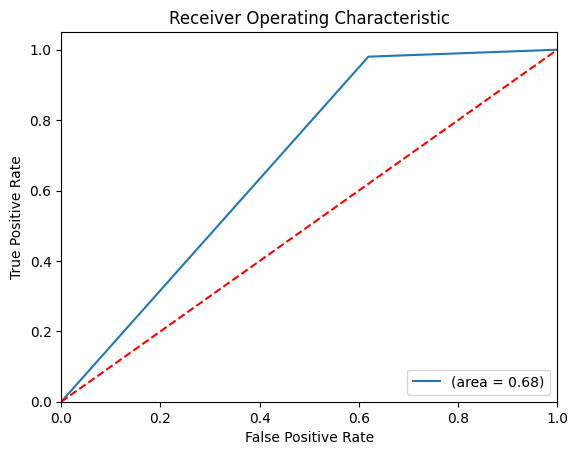

In [ ]:
#Supervised Methods
# 3 normal methods
# 2 ensemble methods
gnb = GaussianNB()
gnbmodel = gnb.fit(X_over, y_over)
y_pred = gnbmodel.predict(X_test)
print ("Score:", gnbmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(gnb,X_test,y_test)

Accuracy:  0.8640339915021245
Confusion Matrix: 
 [[1986  443]
 [ 101 1471]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      2429
           1       0.77      0.94      0.84      1572

    accuracy                           0.86      4001
   macro avg       0.86      0.88      0.86      4001
weighted avg       0.88      0.86      0.87      4001



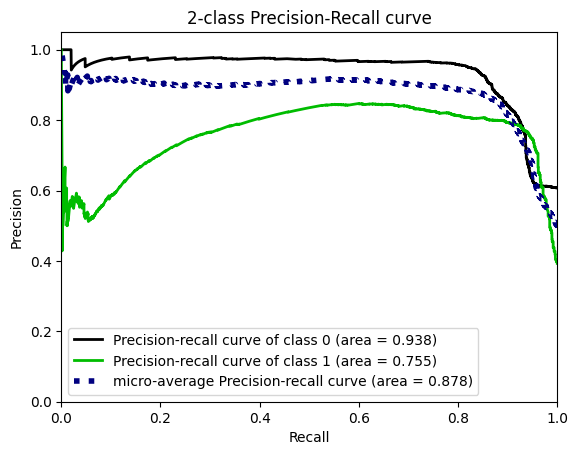

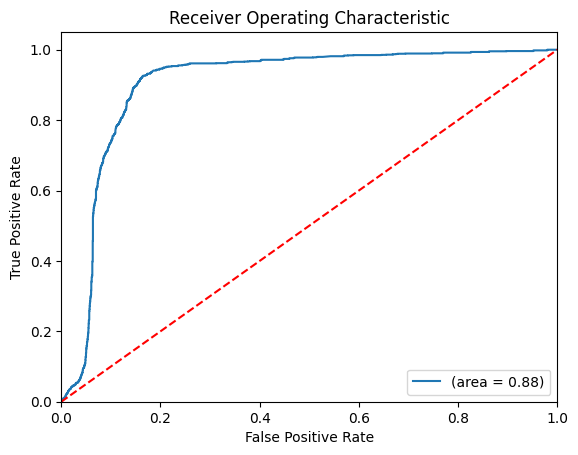

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Standardize the data
scaler = StandardScaler()
X_over_scaled = scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)

# Create the Logistic Regression model with increased max_iter
lgr = LogisticRegression(max_iter=1000, solver='lbfgs')  # Increased from the default 100 to 1000
lgr.fit(X_over_scaled, y_over)
y_pred = lgr.predict(X_test_scaled)

# Print the results
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(lgr, X_test_scaled, y_test)


Accuracy:  0.8470382404398901
Confusion Matrix: 
 [[1879  550]
 [  62 1510]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      2429
           1       0.73      0.96      0.83      1572

    accuracy                           0.85      4001
   macro avg       0.85      0.87      0.85      4001
weighted avg       0.88      0.85      0.85      4001



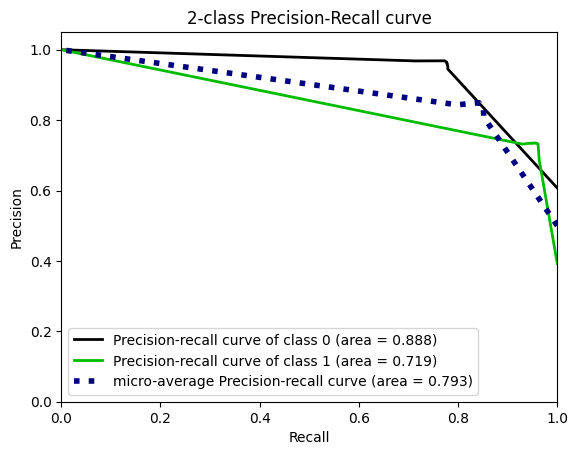

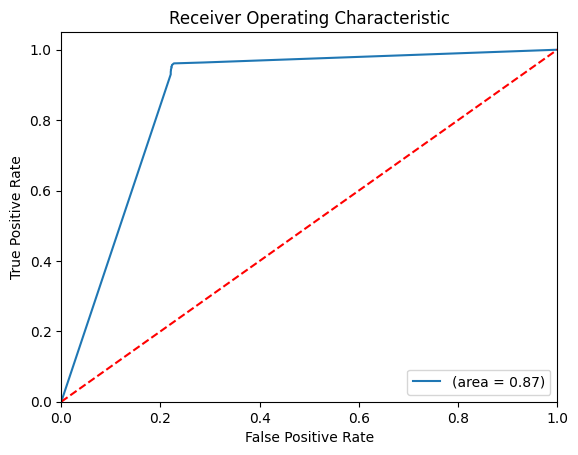

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_over, y_over)
y_pred = dtc.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(dtc,X_test,y_test)

## Ensemble Methods

Accuracy:  0.715071232191952
Confusion Matrix: 
 [[1617  812]
 [ 328 1244]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74      2429
           1       0.61      0.79      0.69      1572

    accuracy                           0.72      4001
   macro avg       0.72      0.73      0.71      4001
weighted avg       0.74      0.72      0.72      4001



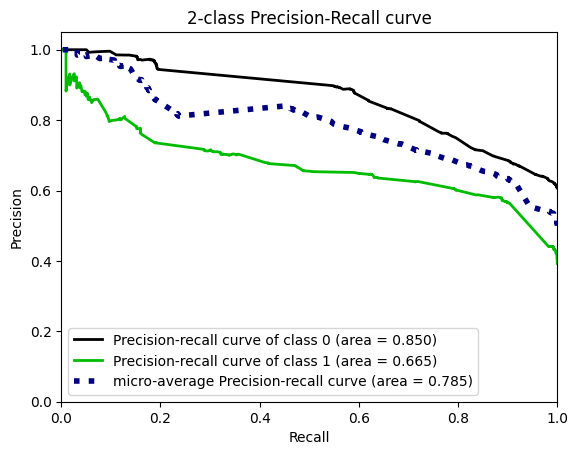

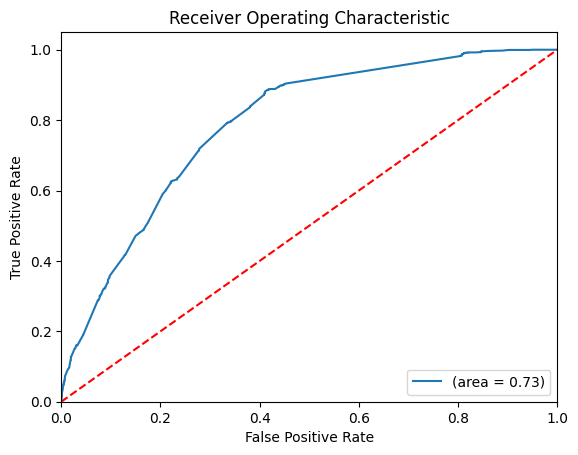

In [ ]:
#Ensemble methods from here
abc = AdaBoostClassifier()
abc.fit(X_over, y_over)
y_pred = abc.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(abc,X_test,y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


Score: 0.9172706823294177
Confusion Matrix: 
 [[2174  255]
 [  76 1496]]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s


              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2429
           1       0.85      0.95      0.90      1572

    accuracy                           0.92      4001
   macro avg       0.91      0.92      0.91      4001
weighted avg       0.92      0.92      0.92      4001



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s


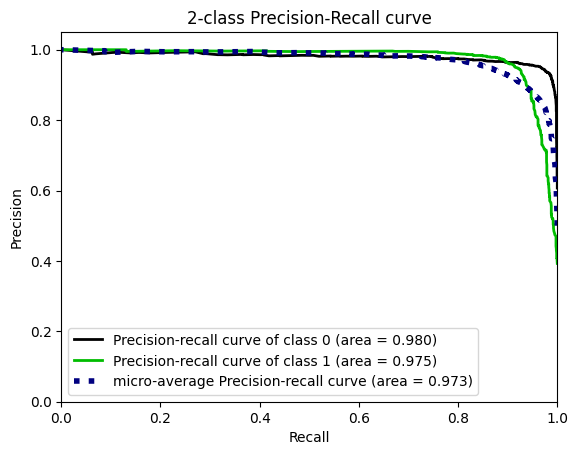

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


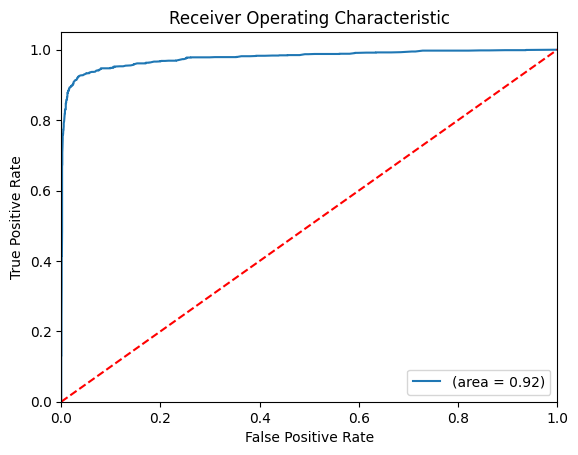

In [ ]:
rfc = RandomForestClassifier(verbose=True) #uses randomized decision trees
rfcmodel = rfc.fit(X_over, y_over)
y_pred = rfc.predict(X_test)
print ("Score:", rfcmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(rfc,X_test,y_test)

# Deep Learning Models

## ANN

In [21]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_over.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(X_over, y_over, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stop], verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy}')

# Print classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


Epoch 1/50
244/244 [==============================] - 31s 122ms/step - loss: 0.5393 - accuracy: 0.7163 - val_loss: 0.3982 - val_accuracy: 0.8546
Epoch 2/50
244/244 [==============================] - 24s 97ms/step - loss: 0.2583 - accuracy: 0.8971 - val_loss: 0.1636 - val_accuracy: 0.9549
Epoch 3/50
244/244 [==============================] - 41s 170ms/step - loss: 0.1057 - accuracy: 0.9621 - val_loss: 0.0819 - val_accuracy: 0.9751
Epoch 4/50
244/244 [==============================] - 26s 106ms/step - loss: 0.0530 - accuracy: 0.9825 - val_loss: 0.0743 - val_accuracy: 0.9767
Epoch 5/50
244/244 [==============================] - 27s 113ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0599 - val_accuracy: 0.9813
Epoch 6/50
244/244 [==============================] - 34s 138ms/step - loss: 0.0284 - accuracy: 0.9905 - val_loss: 0.0536 - val_accuracy: 0.9851
Epoch 7/50
244/244 [==============================] - 36s 150ms/step - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.0506 - val_acc

### Unit testing

In [22]:
import unittest
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Sample data dimensions (replace with actual data)
X_over = np.random.rand(100, 10)
y_over = np.random.randint(0, 2, size=(100,))
X_test = np.random.rand(20, 10)
y_test = np.random.randint(0, 2, size=(20,))

class TestANNModel(unittest.TestCase):

    def setUp(self):
        # Define and compile the model
        self.model = Sequential([
            Dense(512, activation='relu', input_shape=(X_over.shape[1],)),
            Dropout(0.5),
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    def test_model_architecture(self):
        # Test the model architecture
        expected_layers = [Dense, Dropout, Dense, Dropout, Dense]
        for layer, expected_layer_type in zip(self.model.layers, expected_layers):
            self.assertIsInstance(layer, expected_layer_type)

        self.assertEqual(len(self.model.layers), 5)  # Check number of layers

    def test_model_training(self):
        # Test model training
        history = self.model.fit(X_over, y_over, epochs=3, batch_size=32, validation_split=0.2, verbose=0)
        self.assertEqual(len(history.history['accuracy']), 3)  # Check if training history is recorded

    def test_model_evaluation(self):
        # Test model evaluation
        self.model.fit(X_over, y_over, epochs=3, batch_size=32, validation_split=0.2, verbose=0)
        loss, accuracy = self.model.evaluate(X_test, y_test, verbose=0)
        self.assertGreater(accuracy, 0.0)  # Check if accuracy is greater than 0

    def test_classification_report(self):
        # Test classification report generation
        self.model.fit(X_over, y_over, epochs=3, batch_size=32, validation_split=0.2, verbose=0)
        y_pred = (self.model.predict(X_test) > 0.5).astype("int32")
        report = classification_report(y_test, y_pred)
        self.assertTrue(len(report) > 0)  # Check if classification report is generated

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_classification_report (__main__.TestANNModel) ... 

1/1 [==============================] - 0s 43ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
ok
test_model_architecture (__main__.TestANNModel) ... ok
test_m

### Integration Testing

In [24]:
import unittest
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

class TestANNIntegration(unittest.TestCase):

    def setUp(self):
        # Dummy data for integration testing
        np.random.seed(42)
        self.X = np.random.rand(1000, 10)  # Example shape of X
        self.y = np.random.randint(0, 2, size=(1000,))  # Example shape of y

    def test_model_training_integration(self):
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # Define the ANN model
        model = Sequential([
            Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
            Dropout(0.5),
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Train the model
        early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
        model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stop], verbose=1)

        # Evaluate the model
        loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
        self.assertGreaterEqual(accuracy, 0.5)  # Example assertion for accuracy

    def test_model_evaluation_integration(self):
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # Define the ANN model (same as in test_model_training_integration)
        model = Sequential([
            Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
            Dropout(0.5),
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Train the model
        model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=0)

        # Evaluate the model
        loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
        self.assertGreaterEqual(accuracy, 0.5)  # Example assertion for accuracy

    def test_model_prediction_integration(self):
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # Define the ANN model (same as in test_model_training_integration)
        model = Sequential([
            Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
            Dropout(0.5),
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Train the model
        model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=0)

        # Make predictions
        y_pred = (model.predict(X_test) > 0.5).astype("int32").reshape(-1)

        # Check predictions shape and values
        self.assertEqual(y_pred.shape[0], X_test.shape[0])  # Ensure number of predictions matches input
        self.assertTrue(np.all(np.logical_or(y_pred == 0, y_pred == 1)))  # Ensure predictions are binary

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


7/7 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5400


7/7 [==============================] - 0s 5ms/step


.

Epoch 1/10
10/10 [==============================] - 2s 20ms/step - loss: 0.6965 - accuracy: 0.5047 - val_loss: 0.6976 - val_accuracy: 0.5125
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6946 - accuracy: 0.5188 - val_loss: 0.6925 - val_accuracy: 0.5063
Epoch 3/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6908 - accuracy: 0.5391 - val_loss: 0.6913 - val_accuracy: 0.5125
Epoch 4/10
10/10 [==============================] - 0s 12ms/step - loss: 0.6956 - accuracy: 0.5172 - val_loss: 0.6893 - val_accuracy: 0.5375
Epoch 5/10
10/10 [==============================] - 0s 9ms/step - loss: 0.6886 - accuracy: 0.5500 - val_loss: 0.6893 - val_accuracy: 0.5312
Epoch 6/10
10/10 [==============================] - 0s 9ms/step - loss: 0.6794 - accuracy: 0.5813 - val_loss: 0.6885 - val_accuracy: 0.5312
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 0.6850 - accuracy: 0.5484 - val_loss: 0.6891 - val_accuracy: 0.5437
Epoch 8/10
10/10 

.

1/1 [==============================] - 0s 46ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
....
-----------------------------------------------------------

### Smoke testing

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Dummy data for smoke testing
np.random.seed(42)
X_over = np.random.rand(100, 10)  # Example shape of X_over
y_over = np.random.randint(0, 2, size=(100,))  # Example shape of y_over
X_test = np.random.rand(20, 10)  # Example shape of X_test
y_test = np.random.randint(0, 2, size=(20,))  # Example shape of y_test

# Define the ANN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_over.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model for a small number of epochs
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(X_over, y_over, epochs=2, batch_size=64, validation_split=0.2, callbacks=[early_stop], verbose=1)

# Evaluate the model on a small test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy}')

# Print classification report (optional)
y_pred = (model.predict(X_test) > 0.5).astype("int32").reshape(-1)
print(classification_report(y_test, y_pred))


Epoch 1/2
2/2 [==============================] - 1s 216ms/step - loss: 0.6900 - accuracy: 0.5625 - val_loss: 0.6987 - val_accuracy: 0.4500
Epoch 2/2
1/1 [==============================] - 0s 24ms/step - loss: 0.6932 - accuracy: 0.5000
Test Accuracy: 0.5


1/1 [==============================] - 0s 59ms/step
              precision    recall  f1-score   support

           0       0.44      1.00      0.62         8
           1       1.00      0.17      0.29        12

    accuracy                           0.50        20
   macro avg       0.72      0.58      0.45        20
weighted avg       0.78      0.50      0.42        20



### Regression Testing

In [26]:
import unittest
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

class TestANNRegression(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        # Generate consistent dummy data for regression testing
        np.random.seed(42)
        cls.X_train = np.random.rand(1000, 10)
        cls.y_train = np.random.randint(0, 2, size=(1000,))
        cls.X_test = np.random.rand(200, 10)
        cls.y_test = np.random.randint(0, 2, size=(200,))

        # Define the ANN model architecture
        cls.model = Sequential([
            Dense(512, activation='relu', input_shape=(cls.X_train.shape[1],)),
            Dropout(0.5),
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])

        cls.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Train the model
        early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
        cls.model.fit(cls.X_train, cls.y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stop], verbose=0)

        # Evaluate the model on test data
        cls.initial_loss, cls.initial_accuracy = cls.model.evaluate(cls.X_test, cls.y_test, verbose=0)
        print(f'Initial Test Accuracy: {cls.initial_accuracy}')

        # Save the model weights for regression testing
        cls.model.save_weights('initial_model_weights.h5')

    def test_regression_model_accuracy(self):
        # Load the initial model weights for regression testing
        self.model.load_weights('initial_model_weights.h5')

        # Evaluate the model again using the same test data
        loss, accuracy = self.model.evaluate(self.X_test, self.y_test, verbose=0)

        # Compare current accuracy with initial accuracy
        self.assertAlmostEqual(accuracy, self.initial_accuracy, places=2, msg="Regression test failed: Model accuracy has regressed.")

    def test_regression_model_loss(self):
        # Load the initial model weights for regression testing
        self.model.load_weights('initial_model_weights.h5')

        # Evaluate the model again using the same test data
        loss, accuracy = self.model.evaluate(self.X_test, self.y_test, verbose=0)

        # Compare current loss with initial loss
        self.assertAlmostEqual(loss, self.initial_loss, places=2, msg="Regression test failed: Model loss has regressed.")

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


7/7 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5250


.

7/7 [==============================] - 0s 2ms/step


.

Epoch 1/10
10/10 [==============================] - 1s 20ms/step - loss: 0.7000 - accuracy: 0.4953 - val_loss: 0.6966 - val_accuracy: 0.5125
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 0.6986 - accuracy: 0.4844 - val_loss: 0.6919 - val_accuracy: 0.5125
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.6987 - accuracy: 0.4875 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5031 - val_loss: 0.6876 - val_accuracy: 0.5625
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6872 - accuracy: 0.5344 - val_loss: 0.6877 - val_accuracy: 0.5625
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.6882 - accuracy: 0.5391 - val_loss: 0.6886 - val_accuracy: 0.5125
Epoch 7/10
10/10 [==============================] - 0s 11ms/step - loss: 0.6861 - accuracy: 0.5516 - val_loss: 0.6871 - val_accuracy: 0.5375
Epoch 8/10
10/10 [

.

1/1 [==============================] - 0s 47ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
....

Epoch 4: early stopping
Initial Test Accuracy: 0.4749999940395355


..
----------------------------------------------------------------------
Ran 9 tests in 10.818s

OK


## XLSTM

X_train shape: torch.Size([16000, 14783])
y_train shape: torch.Size([16000])
X_test shape: torch.Size([4001, 14783])
y_test shape: torch.Size([4001])


<ipython-input-51-96e072c3f456>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-51-96e072c3f456>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-51-96e072c3f456>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-51-96e072c3f456>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or s

Epoch [5/50], Loss: 0.0047
Epoch [10/50], Loss: 0.0136
Epoch [15/50], Loss: 0.0107
Epoch [20/50], Loss: 0.0000
Epoch [25/50], Loss: 0.0071
Epoch [30/50], Loss: 0.0000
Epoch [35/50], Loss: 0.0000
Epoch [40/50], Loss: 0.0000
Epoch [45/50], Loss: 0.0000
Epoch [50/50], Loss: 0.0000
Train Accuracy: 99.44%
Test Accuracy: 92.83%
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      2429
         1.0       0.89      0.94      0.91      1572

    accuracy                           0.93      4001
   macro avg       0.92      0.93      0.93      4001
weighted avg       0.93      0.93      0.93      4001



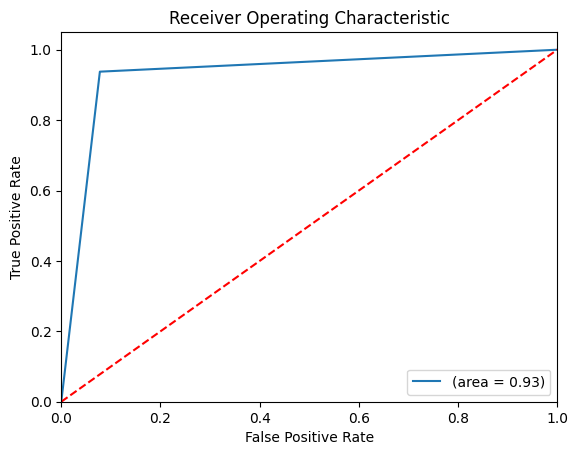

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import scikitplot as skplt
import matplotlib.pyplot as plt

# Verify the shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Ensure tensors are of type torch.Tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 50
num_layers = 2
output_size = 1
num_epochs = 50
learning_rate = 0.01

# Initialize the model, loss function, and optimizer
model = SimpleXLSTM(input_size, hidden_size, num_layers, output_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# DataLoader for batching
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

# Training loop
model.train()
for epoch in range(num_epochs):
    for seqs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(seqs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train).squeeze()
    y_pred_test = model(X_test).squeeze()

y_pred_train = (torch.sigmoid(y_pred_train) >= 0.5).float()
y_pred_test = (torch.sigmoid(y_pred_test) >= 0.5).float()

# Calculate accuracy
train_accuracy = (y_pred_train == y_train).sum().item() / len(y_train)
test_accuracy = (y_pred_test == y_test).sum().item() / len(y_test)

print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print classification report
y_test_np = y_test.cpu().numpy()
y_pred_test_np = y_pred_test.cpu().numpy()

print(classification_report(y_test_np, y_pred_test_np))

# Plot ROC curve
logit_roc_auc = roc_auc_score(y_test_np, y_pred_test_np)
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_test_np)

plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Bi-LSTM

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1895680   
                                                                 
 bidirectional (Bidirection  (None, 100, 256)          263168    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 100, 256)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 2553345 (9.74 MB)
Trainable params: 255334

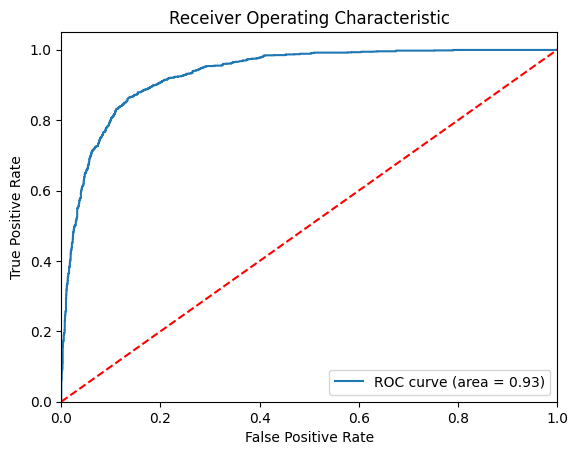

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import scikitplot as skplt


# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['content'])
sequences = tokenizer.texts_to_sequences(df['content'])
word_index = tokenizer.word_index

max_sequence_length = 100
data = pad_sequences(sequences, maxlen=max_sequence_length)

# Splitting the data
X = data
y = np.array(df['annotation'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Oversample the training data
oversample = RandomOverSampler(sampling_strategy='not majority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

# Define the model
vocab_size = len(word_index) + 1
embedding_dim = 128
lstm_units = 128

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    Bidirectional(LSTM(lstm_units, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(lstm_units)),
    Dense(1, activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
batch_size = 32
epochs = 30

history = model.fit(X_train_over, y_train_over,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

print(classification_report(y_test, y_pred_classes))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()